**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho


Grupo número ( A  )

---


Aluno(a): Alison Pereira Ribeiro

---

Aluna(o): Leidiane Beatriz Passos Rodrigues

---

Aluno(a): Thiago de Andrade Corrêa

---

#Especificação do problema : Algoritmos genéticos


Utilizando a base de dados fornecida, determinar qual é o melhor grupo de disciplinas a serem cursadas pelos alunos do curso de Ciência da Computação, a cada semestre, de forma a terem maior sucesso, isto é, terem a maior média geral de notas e o menor número de reprovações.

Para a definição do modelo, especificar:

1. Representação (binária, decimal, etc. );
2. Método de seleção (aleatória, roleta,...);
3. Número de cromossomos por população;
4. Probabilidade de cruzamento e estratégia de corte (um ou mais pontos, máscara, etc.);
5. Probabilidade de mutação;
6. População inicial (aleatória ou heurística);
7. Critérios de parada (número máximo de gerações, aptidão, etc.).


**Observação**: O trabalho deve ser feito em grupo, mas a avaliação será feita individualmente. Para isso, o grupo deverá fazer um planejamento/cronograma de trabalho e a contribuição de cada membro deverá ser devidamente identificado.


#Planejamento de atividades

Utilizar a ferramenta  [Trello](https://trello.com )  para organizar o trabalho, distribuindo as tarefas e registrando (EXPLICITAMENTE) as interações entre os membros do grupo.

- Eleger um gerente de projeto para organizar as atividades no Trello e coordenar a equipe.
- Planejar o que deve ser feito, distribuindo equitativamente as atividades entre os membros do grupo. Estabelecer atividades a serem feitas, prazos para sua entrega e produtos a serem entregues para cada atividade.

- O planejamento das atividades deve, necessariamente incluir:
  - Cronograma do trabalho a ser realizado.
  - Associação das tarefas a serem realizadas a quem deverá realizá-las.
  - Cada tarefa deve estar associada a um produto a ser entregue.
  - Em todos os dias devem ser atribuídas atividades a todos os membros do grupo.
  
- **O planejamento deve ser entregue na primeira aula em que o tópico for trabalhado**.



# Descrição do modelo

- O grupo deverá descrever o modelo a ser implementado e como ele foi instanciado para resolver o problema proposto.
- Os dados utilizados devem ser detalhadamente descritos. 

  - Quais os dados efetivamente utilizados da base de dados fornecida?
  
  

---



---

### Descrição do nosso modelo para o Algoritmo Genético

- Algoritmo Genético (AG) consiste em uma técnica de Inteligência Artificial (IA) que se fundamenta em teorias e conceitos da genética e da evolução de populações de seres vivos. A implementação de tal técnica visa possibilitar que soluções ótimas, sejam encontradas para resolver problemas, do mundo real, detectados em diversas áreas do conhecimento. 

- Neste trabalho, utilizamos a base de dados fornecida, para determinar qual é o melhor grupo de disciplinas a serem cursadas pelos alunos do curso de Ciência da Computação, a cada semestre, de forma a terem maior sucesso, isto é, terem a maior média geral de notas e o menor número de reprovações.

Para a definição do modelo, utilizamos a seguinte configuração:

1. Representação: **binária**;
2. Método de seleção: **aleatória**;
3. Número de cromossomos por população: ? **8**
4. Probabilidade de cruzamento e estratégia de corte: **um ponto** 
5. Probabilidade de mutação: **0,2, ou seja, 20% de chance**;
6. População inicial: **aleatória**;
7. Critérios de parada: **Número de gerações igual a 8**

Vamos considerar um cromossomo como um conjunto binário de 41 genes, onde cada gene representa uma disciplina da graduação. A população inicial será composta por oito cromossomos, um para cada semestre. Cada gene será 1, caso aquela matéria pertença àquele semestre; caso contrário, será 0.


#Preparação dos Dados


Os dados devem ser preparados para representarem o que queremos. Cada matéria terá um locus no cromossomo.
Uma figura mais abaixo explicitará o locus de cada disciplina no cromossomo, a cada iteração, o algoritmo irá cruzar os semestres para achar o melhor indivíduo para cada semestre.


In [0]:
#Carregando a base dados

from google.colab import files
uploaded = files.upload()

Saving baseDeDados.csv to baseDeDados.csv


In [0]:
import pandas as pd
import numpy as np

# A base de dados abaixo será utilizada para a criação da população inicial
dataset = pd.read_csv('baseDeDados.csv', sep=';')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# Elimina as colunas indesejadas
data = dataset.drop(['nota_discente_componente','quantidade_trancamentos','quantidade_reprovacoes_nc','quantidade_reprovacoes_nl','quantidade_reprovacoes_neobr','quantidade_reprovacoes_neopt','nota_discente_componente','idade_conclusao_ensino_medio',
       'uf_naturalidade_discente', 'discente_estudou_escola_publica?',
       'ano_conclusao_ensino_medio', 'nome_municipio_curso',
       'nome_campus_curso', 'nome_curso', 'grau_academico', 'modalidade',
       'turno', 'ingresso_judicial?', 'forma_ingresso',
       'especificidade_ingresso_ps', 'categoria_ingresso_ps',
       'opcao_participacao_ps', 'opcao_aprovacao_ps', 'nota_liguagem_enem',
       'nota_ciencias_humanas_enem', 'nota_ciencias_natureza_enem',
       'nota_matematica_enem', 'nota_redacao_enem', 'nota_linguagem_sisu',
       'nota_ciencias_humanas_sisu', 'nota_ciencias_natureza_sisu',
       'nota_matematica_sisu', 'nota_redacao_sisu', 'nota_no_curso_sisu',
       'nota_corte_curso_sisu','ch_total_integralizada_discente', 'discente_percentual_integralizacao',
       'codigo_matriz_curricular','ch_total_minima_matriz_curricular',
       'ch_maxima_semestre_matriz_curricular',
       'prazo_conclusao_minino_matriz_curricular',
       'prazo_conclusao_medio_matriz_curricular',
       'prazo_conclusao_maximo_matriz_curricular',
       'matriz_semestre_previsto_cursar_compomente', 'codigo_turma_componente',
       'ano_periodo_oferta_turma', 'turma_ead?',
       'ch_total_componente', 'frequencia_discente_componente',
       'ano_nascimento_discente',
       'ano_periodo_inativacao', 'motivo_inativacao', 'data_inativacao',
       'data_colacao_grau', 'media_global_atual_matriz_curricular', 'semestre_cursado',
       'codigo_componente', 'idade_ingresso_universidade', 'idade_colacao_grau'], axis=1)

In [0]:
data.head()

,id,ano_periodo_ingresso,situacao_discente,media_global_atual_discente,ano_periodo_cursado_componente,nome_componente,semestre_previsto_componente,situacao_discente_componente
0,1,2008.1,GRADUADO,5.01,2009.2,CÁLCULO 1,1,AP
1,1,2008.1,GRADUADO,5.01,2009.1,LÓGICA MATEMÁTICA,1,AP
2,1,2008.1,GRADUADO,5.01,2009.1,MATEMÁTICA DISCRETA,1,AP
3,1,2008.1,GRADUADO,5.01,2010.1,FÍSICA PARA COMPUTAÇÃO,2,AP
4,1,2008.1,GRADUADO,5.01,2011.2,ÁLGEBRA LINEAR,2,RM


In [0]:
class Preprocessamento:
    def __init__(self, data):
        self.lista_id = []                                                      # Lista de id's dos alunos
        self.periodo_cursado = []                                               # Mostra o periodo no qual ele cursou
        self.semestre_previsto = []                                             # Mostra o periodo que deveria ter cursado
        self.data = data                                                        # DataFrame com os dados dos alunos
        self.media_global = []
        self.disciplinas = []
        self.data_frame = None
        self.modelo = None
                
    def captura_ids_alunos(self):
        # Número de alunos que se formaram
        self.lista_id = [] # Lista que guarda os id's eliminando repetições
        for i in self.data.id:
            if i not in self.lista_id:
                self.lista_id.append(i)
                
    def gera_matriz_do_modelo(self):
        l = [0] * len(self.disciplinas)
        dados = [l] * len(self.lista_id)
        self.data_frame = pd.DataFrame(dados) 
        #self.data_frame['id'] = self.lista_id
        
        df = self.data[self.data.situacao_discente == 'GRADUADO']
        df = df[df.situacao_discente_componente == 'AP']
        df = df[df.media_global_atual_discente == 9.34]
        
        #df = df.drop_duplicates(subset='id', keep='first', inplace=False)   # Remove as duplicatas, pois um aluno pode reprovar várias vezes na mesma disciplina
        return df
        
        self.semestre_previsto = df.semestre_previsto_componente
        self.periodo_cursado = df.ano_periodo_cursado_componente	
        self.media_global = df.media_global_atual_discente
                    
    def remove_duplicatas(self):
        # Removendo duplicatas, deixando apenas uma linha por aluno
        self.data = self.data.drop_duplicates(subset='id', keep='first', inplace=False)
            
    def constroi_modelo(self):
        keys = ['modelo', 'id','sem_prev','sem_curs']
        self.modelo = dict.fromkeys(keys)
        
        self.modelo['modelo'] = self.data_frame
        self.modelo['id'] = self.lista_id
        self.modelo['sem_prev'] = self.semestre_previsto
        self.modelo['sem_curs'] = self.periodo_cursado
        self.modelo['media_global'] = max(self.media_global)


In [0]:
# Só pega alunos GRADUADOS
data_grad = data[data.situacao_discente_componente == 'AP']

# Objeto do dataframe dos alunos graduados
grad   = Preprocessamento(data_grad)

# Preparando os dados dos alunos GRADUADOS
grad.captura_ids_alunos()                                                       # Função que captura dos id's dos alunos ignorando repetições
grad = grad.gera_matriz_do_modelo()
#grad.constroi_modelo()                                                          # Função que constrói o modelo final
#data_grad = grad.modelo

Ao final dessa filtragem, temos o melhor aluno em nota, maior média global, que servirá para comparação com os indivíduos gerados pelo Algoritmo Genético.

In [0]:
grad = grad.drop(['id', 'situacao_discente', 'situacao_discente_componente'], axis=1)  #usei essas colunas somente para filtrar os resultados

In [0]:
# numero de linhas na tabela indica as materias que ele pegou, o fluxo indica que sao 43. Ha um desvio aqui, a tabela nao mostra
# todas as disciplinas

grad.count()

ano_periodo_ingresso              39
media_global_atual_discente       39
ano_periodo_cursado_componente    39
nome_componente                   39
semestre_previsto_componente      39
dtype: int64

In [0]:
grad

,ano_periodo_ingresso,media_global_atual_discente,ano_periodo_cursado_componente,nome_componente,semestre_previsto_componente
8861,2011.2,9.34,2011.2,CÁLCULO 1,1
8862,2011.2,9.34,2011.2,INTRODUÇÃO À COMPUTAÇÃO,1
8863,2011.2,9.34,2011.2,LÓGICA MATEMÁTICA,1
8864,2011.2,9.34,2011.2,MATEMÁTICA DISCRETA,1
8865,2011.2,9.34,2011.2,PROGRAMAÇÃO DE COMPUTADORES 1 CN,1
8866,2011.2,9.34,2012.1,FÍSICA PARA COMPUTAÇÃO,2
8867,2011.2,9.34,2012.1,ÁLGEBRA LINEAR,2
8868,2011.2,9.34,2012.1,CÁLCULO 2,2
8869,2011.2,9.34,2012.1,PROGRAMAÇÃO DE COMPUTADORES 2 CN,2
8870,2011.2,9.34,2012.1,SISTEMAS DIGITAIS,2


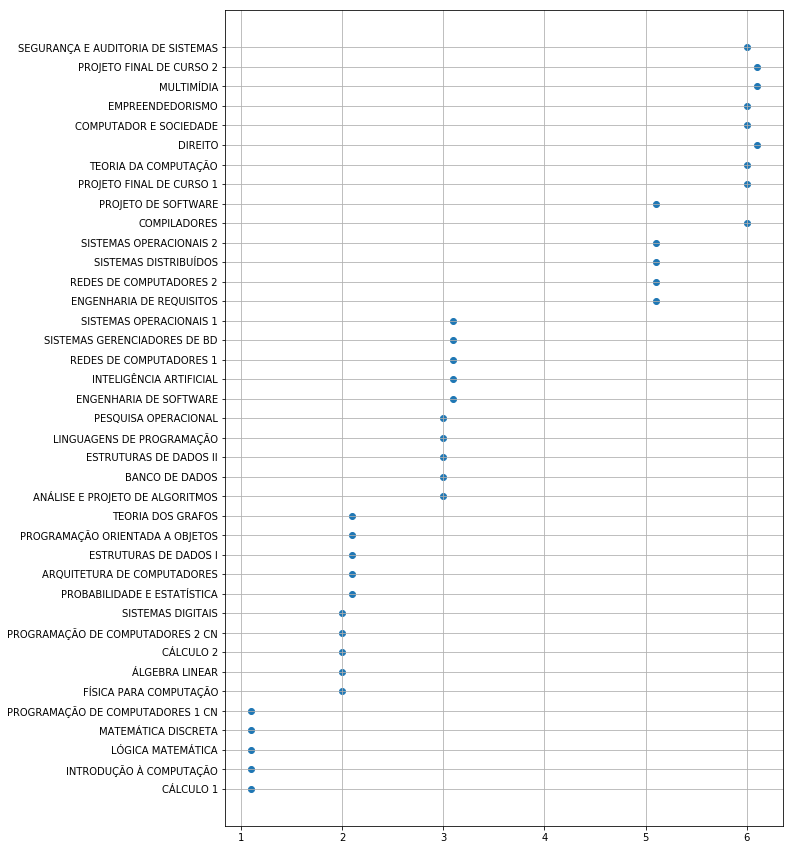

In [0]:
import matplotlib.pyplot as plt


plt.figure(figsize = (10,15))
plt.grid(which = 'both')
plt.scatter((grad['ano_periodo_cursado_componente'] - 2010.1) , grad['nome_componente'], )


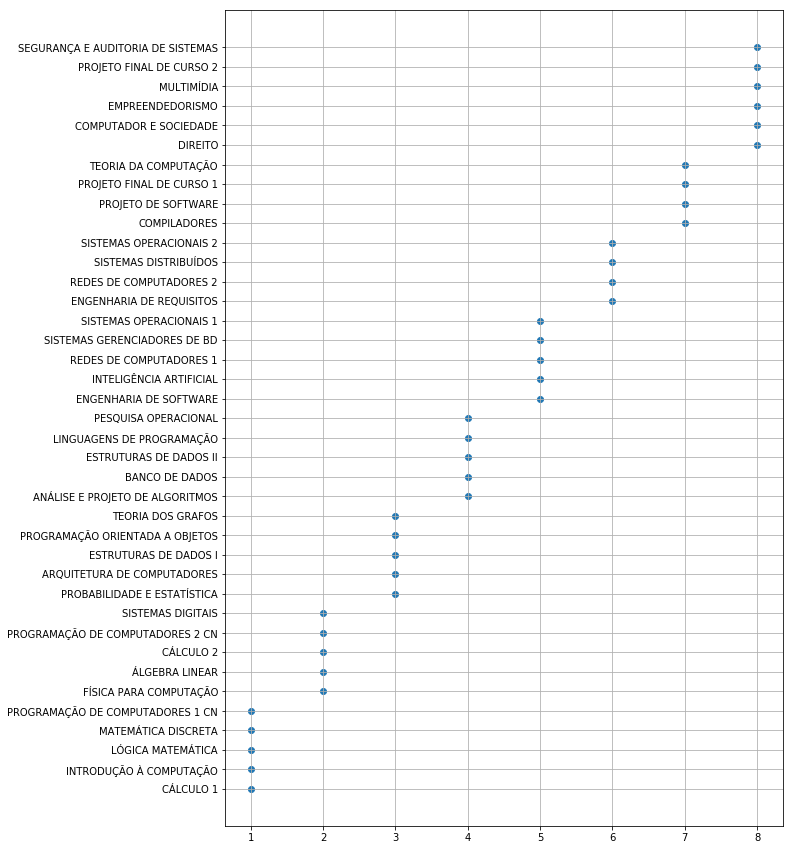

In [0]:
import matplotlib.pyplot as plt


plt.figure(figsize = (10,15))
plt.grid(which = 'both')
plt.scatter(grad['semestre_previsto_componente'] , grad['nome_componente'], )

#Implementação

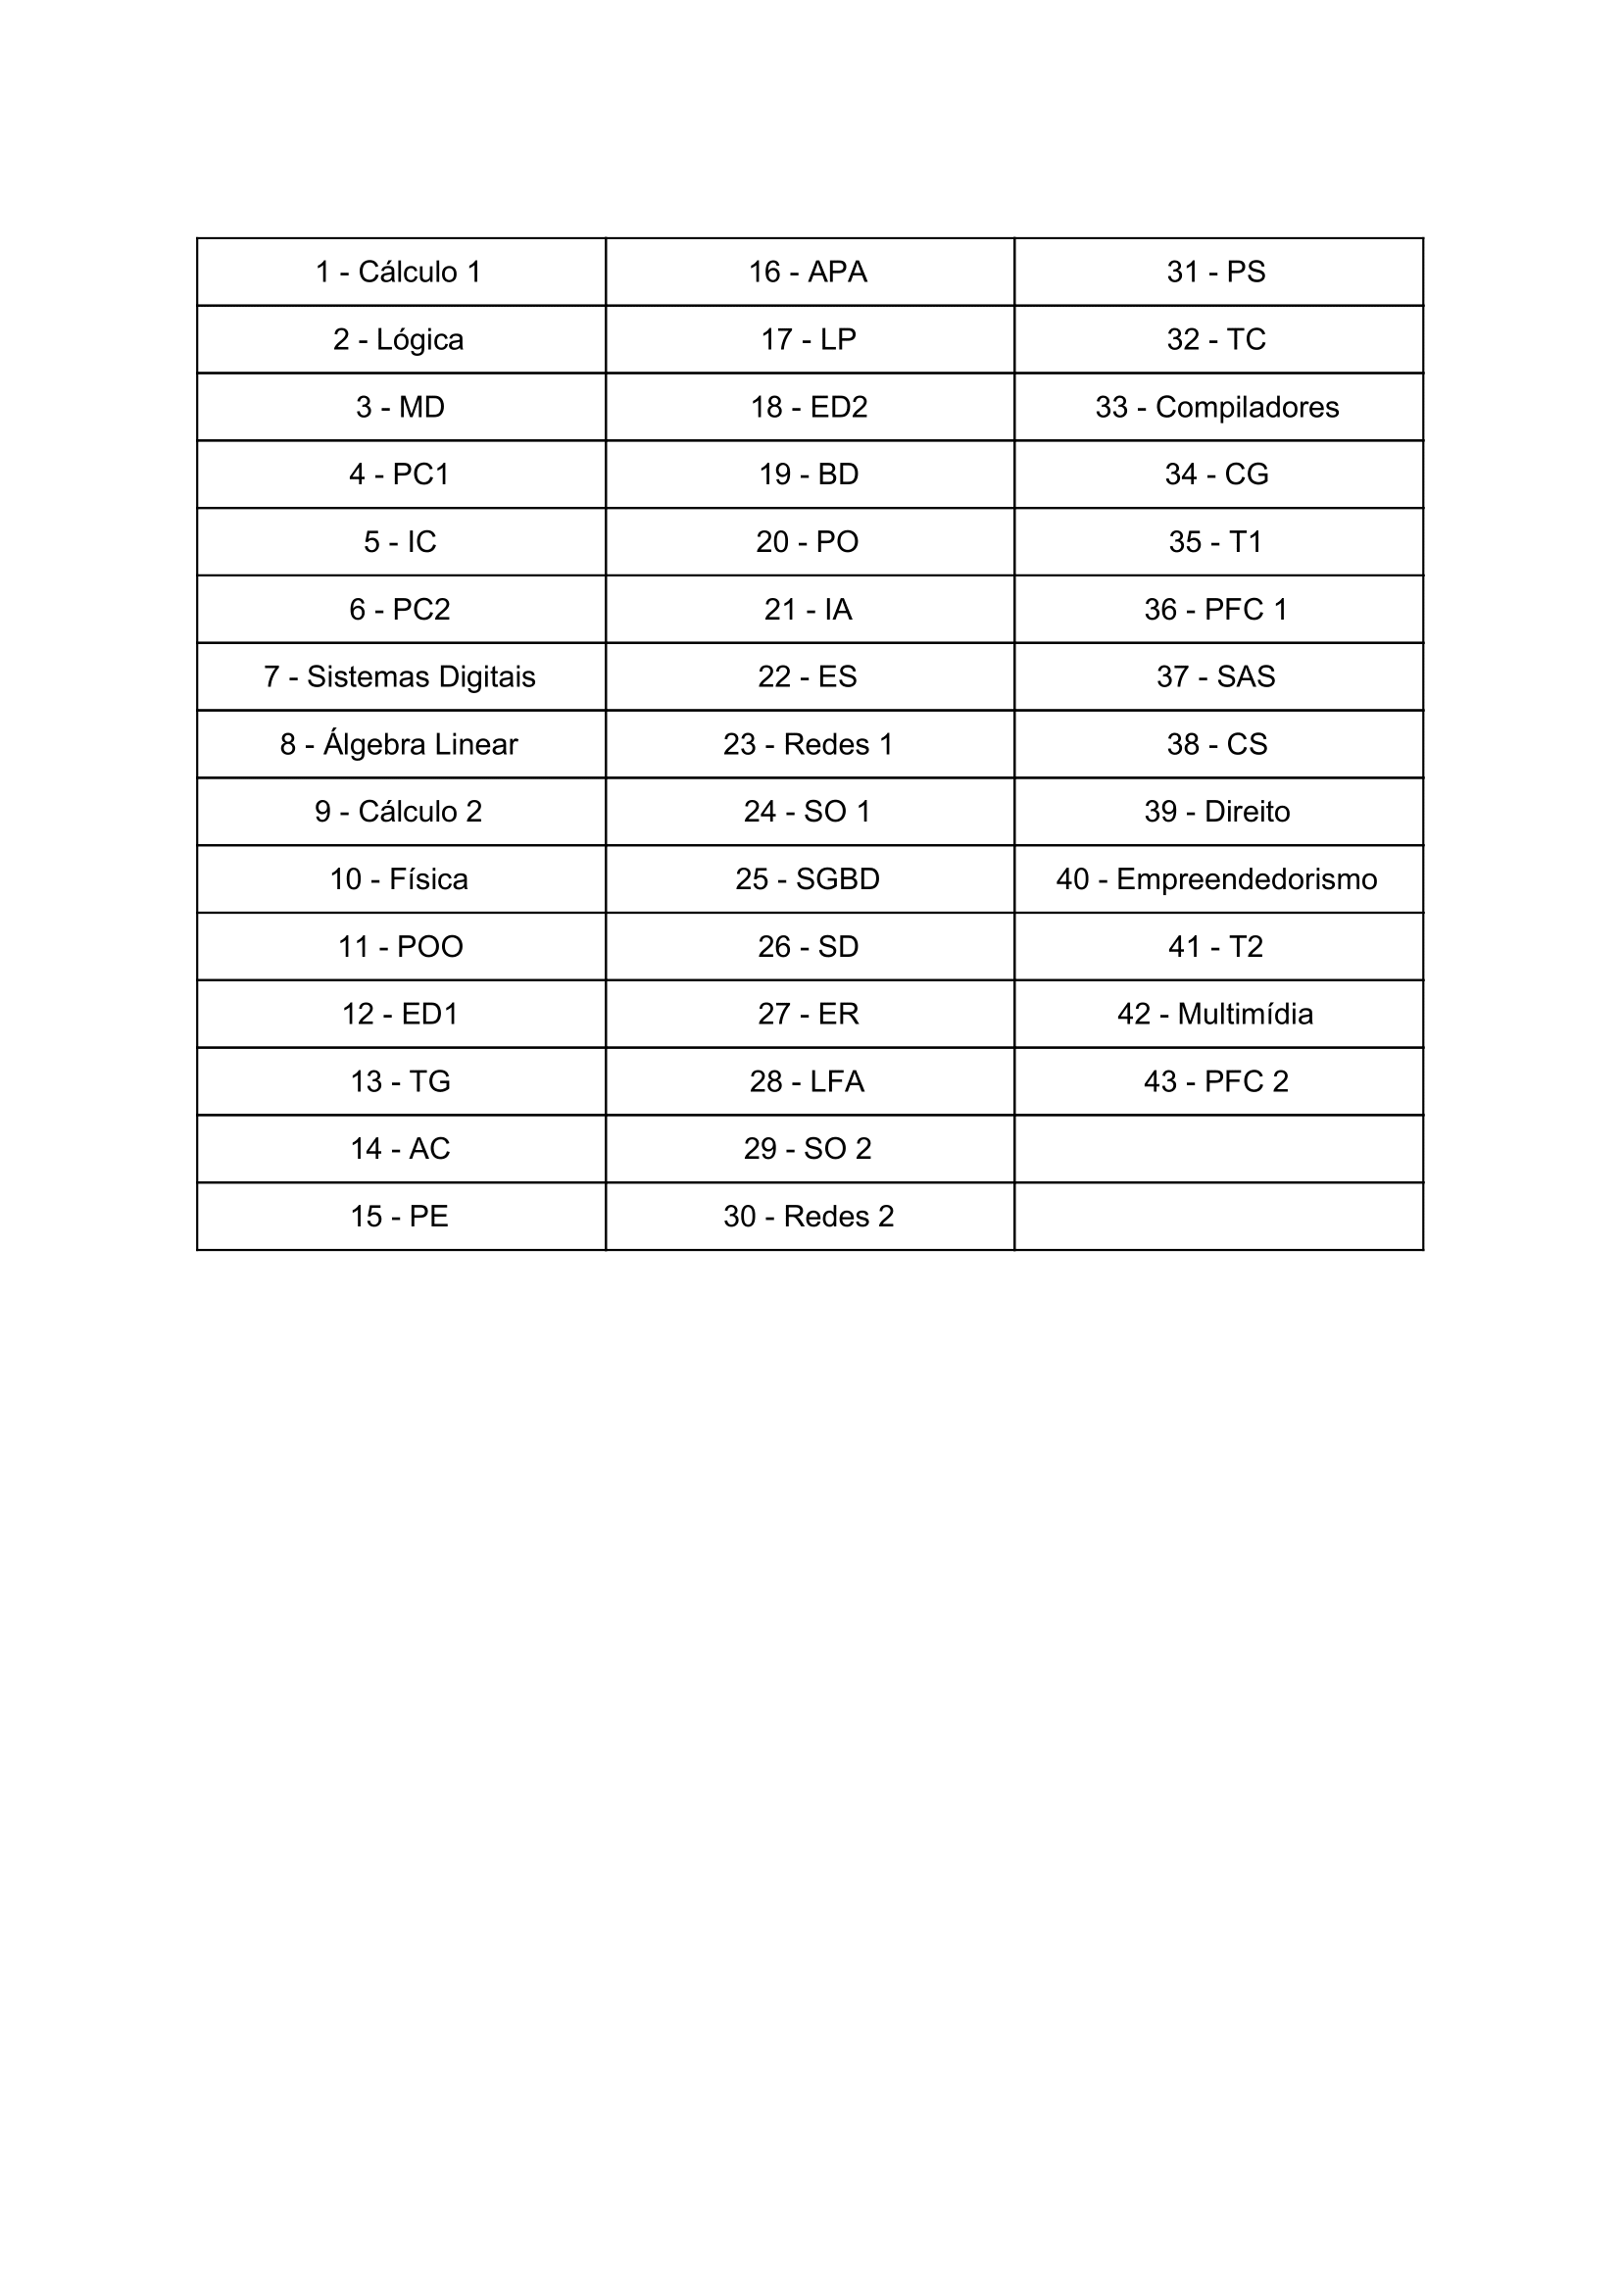

In [0]:
from IPython.display import Image
Image('Tabela Disciplinas-1.png', width=850, height=850)

#Inicializando a população

In [0]:
n = 1
lista1 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
while n <= 5:
    from random import randint
    disciplina = randint(1,43)   #gera aleatoriamente uma disciplina a ser cursada 
    lista1.insert(disciplina, 1)  #insere o valor 1 na posição da disciplina comom especificado na imagem acima
    n = n + 1
    
print (lista1)  #imprime a lista com as 5 matérias geradas

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


#Usando a Biblioteca pyeasyga

**Instalando a biblioteca pyeasyga**

In [39]:
pip install pyeasyga

  Stored in directory: /root/.cache/pip/wheels/ef/cf/ef/7aff9fcd6c1e59dc276182f29a32e7c197665dd5eb547f30e6
Successfully built pyeasyga


#Fazendo o algoritmo receber a população inicial

In [0]:
from pyeasyga import pyeasyga

data = [('lista1', [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]), ('lista2', [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('banana', [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]

#Algoritmo Genético

In [0]:
ga = pyeasyga.GeneticAlgorithm(data,
                               population_size=8,
                               generations=36,
                               crossover_probability=0.8,
                               mutation_probability=0.05,
                               elitism=True,
                               maximise_fitness=True) #gerando a população de acordo com os parâmetros dado

In [0]:
def create_individual(data):
    individual = data[:]
    random.shuffle(individual)
    return individual

ga.create_individual = create_individual  #criando cada indivíduo da população

In [0]:
def crossover(parent_1, parent_2):
    crossover_index = random.randrange(1, len(parent_1))
    child_1 = parent_1[:index] + parent_2[index:]
    child_2 = parent_2[:index] + parent_1[index:]
    return child_1, child_2

ga.crossover_function = crossover



def mutate(individual):
    mutate_index = random.randrange(len(individual))
    if individual[mutate_index] == 0:
        individual[mutate_index] = 1
    else:
        individual[mutate_index] = 0

ga.mutate_function = mutate



def selection(population):
    return random.choice(population)


ga.selection_function = selection


In [0]:
def fitness (individual, data):
    fitness = 0
    if individual.count(1) == 2:
        for (selected, (fruit, profit)) in zip(individual, data):
            if selected:
                fitness += profit
    return fitness


In [0]:
ga.fitness_function = fitness

In [59]:
ga.run()

AttributeError: ignored

In [57]:
print(ga.best_individual())

IndexError: ignored

In [0]:
for individual in ga.last_generation():
    print (individual)

#Avaliação dos resultados

O modelo proposto é capaz de tratar o problema proposto, embora o mesmo não esteja completo por falta de implementação no código. O modelo visa buscar a melhor sugestão de matérias para cada semestre do curso (8) baseado em um sorteio aleatório de matérias que são inseridos em um vetor de 43 posições, onde cada posição representa uma matéria seguindo a ordem da imgem definida anteriormente.

A base foi construida a partir de alunos graduados comparando com os indivíduos gerados para o modelo de algoritmo genético. Para novos alunos basta inicilizar o algoritmo que baseado em suas notas do primeiro período são geradas as melhores disciplinas para se cursar nos semestres subsequente.